<a href="https://colab.research.google.com/github/kevin-bcs/kevin_carbajal/blob/main/L01_03_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El perceptrón y las compuertas lógicas
## Dr. Carlos Villaseñor

Paso 1. Corre la siguiente casilla para importar la paquetería necesaria.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Paso 2. Modifica la siguiente clase para que tenga un método de entrenamiento con el algoritmo del perceptrón.

In [4]:
class Perceptron:

  def __init__(self, n_inputs, learning_rate):
    self.w = - 1 + 2 * np.random.rand(n_inputs)
    self.b = - 1 + 2 * np.random.rand()
    self.eta = learning_rate

  def predict(self, X):
    _, p = X.shape
    y_est = np.zeros(p)
    for i in range(p):
      y_est[i] = np.dot(self.w, X[:,i])+self.b
      if y_est[i] >= 0:
        y_est[i]=1
      else:
        y_est[i]=0
    return y_est

  def fit(self, X, Y, epochs=50):
    _, p = X.shape
    for _ in range(epochs):
      for i in range(p):
        # Escribe las ecuaciones del perceptrón
        y_est = self.predict(X[:,i].reshape(-1,1))
        self.w += self.eta * (Y[i]-y_est)* X[:,1]
        self.b += self.eta * (Y[i]-y_est)

Paso 3. Instancía la siguiente función para poder dibujar la línea que representa el Perceptrón.

In [5]:
# Función para dibujar superficie de desición
def draw_2d_percep(model):
  w1, w2, b = model.w[0], model.w[1], model.b
  plt.plot([-2, 2],[(1/w2)*(-w1*(-2)-b),(1/w2)*(-w1*2-b)],'--k')

Paso 4. Corre el siguiente código para comprobar que la neurona es capaz de aprender la compuerta OR

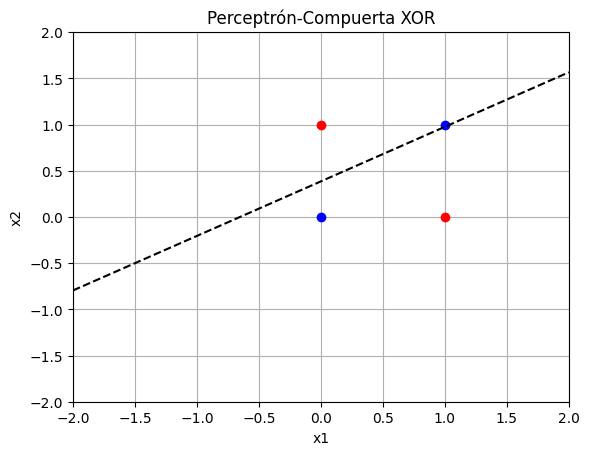

In [26]:
# Instanciar el modelo
model = Perceptron(2, 0.1)

# Datos
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array( [1, 0, 0, 1])

# Entrenar
model.fit(X,Y)

# Predicción
model.predict(X)

# Primero dibujemos los puntos
_, p = X.shape
for i in range(p):
  if Y[i] == 0:
    plt.plot(X[0,i],X[1,i], 'or')
  else:
    plt.plot(X[0,i],X[1,i], 'ob')

plt.title('Perceptrón-Compuerta XOR')
plt.grid('on')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel(r'x1')
plt.ylabel(r'x2')

draw_2d_percep(model)

Paso 5. Realiza el paso anterior con pero con los datos de la compuerta AND y de la compuerta XOR

Paso 6. ¿Que diferencia puedes notar entre el aprendizaje de la compuerta AND y la compuerta XOR?: Escribe aquí tu respuesta

Respuesta: Que la compuerta AND es linealmente separable, se pueden separar perfectamente las salidas verdaderas de las falsas. Mientras que la XOR no es linealente separable, no es posible separar las salidas verdaderas de las falsas como se puede observar en la gráfica superior. Es por ello que los perceptrones simples no funcionan en modelos no lineales.

